<a href="https://colab.research.google.com/github/rafaborneo/rafaelborneo/blob/master/Borneo_01_analisis_y_visualizacion_de_datos_version_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico Análisis y Visualización de Datos 


**Objetivo y alcance:**

Se introducirá la miscelánea disponible para la inspección y visualización de la estadística descriptiva, estadística inferencial y probabilidad conjunta para cada una de las variables físicas de las galaxias, herramientas suficientes para determinar la distribución y estadisticos de las cantidades físicas que caracterizan al dataset y como éstas están relacionadas.

**Método:**
El objetivo será hecho a través de las librerías de python dedicadas a la examinación y visualización, principalmente con librerías como: pandas, numpy, seaborn, matplotlib y scipy. En la parte estadística se estudiarán los intercuartiles, valores extremos, *outliers* y las distribuciones que sigue cada una de las variables ajustadas a la distribución normal, las mismas tambien se visualizarán a través de histogramas y boxplots.  Usando métodos probabilisticos como el teorema de Bayes, chi-cuadrado y el intervalo de confianza de la mediana en los boxplots se verá la correlación entre estas variables.


Estructura del informe:
- Presentación de los datos;
- Visualización de datos categóricos y numéricos;
- Valores explícitos característicos de la distribución de algunas de las variables;
- Vizualización de la distribución con los valores característicos de la misma;
- Ajuste de la distribución a una Normal;
- Examinación de distribuciones de probabilidades discretas y continuas;
- Correlación entre las variables;
- Visualización de correlación entre variables usando mapas de calor;
- Conclusiones.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0. 

# Paquetes 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches


# Carga de Datos

In [ ]:
data = pd.read_csv('galaxias.csv', sep=',')

In [ ]:
display('Head',data.head(6))
display('Tamaño',data.shape)
display('Valores faltantes',data.notnull().all().to_frame())
display('Estadísticos del dataset',data.describe())

'Head'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1
4,129.945145,55.628530,18.08747,16.73876,16.16752,15.83606,15.55770,8.978182,0.035336,-1.919950,0,1,0
5,131.328756,55.842499,18.93437,17.23941,16.45432,16.02061,15.70122,5.162340,0.044426,-2.480055,0,1,0


'Tamaño'

(92102, 13)

'Valores faltantes'

,0
ra,True
dec,True
Mag_u,True
Mag_g,True
Mag_r,True
Mag_i,True
Mag_z,True
R,True
z,True
color,True


'Estadísticos del dataset'

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


# Funciones

In [ ]:
def contar_galaxias(data):
    galaxias_irregulares = data[data.clase == "I"]
    galaxias_espirales = data[data.clase == "S"]
    galaxias_elipticas = data[data.clase == "E"]
    len_galaxias_irregulares = len(galaxias_irregulares.clase)
    len_galaxias_espirales = len(galaxias_espirales.clase)
    len_galaxias_elipticas = len(galaxias_elipticas.clase)
    print("\nGALAXIAS IRREGULARES")
    print("Cantidad: " + str(len_galaxias_irregulares))
    prob_irregulares = probabilidad_galaxia(data,'irregular')
    print("Probabilidad: " + str(prob_irregulares) + " %")
    print("\nGALAXIAS ESPIRALES")
    print("Cantidad: " + str(len_galaxias_espirales))
    prob_espirales = probabilidad_galaxia(data,'espiral')
    print("Probabilidad: " + str(prob_espirales) + " %")
    print("\nGALAXIAS ELÍPTICAS")
    print("Cantidad: " + str(len_galaxias_elipticas))
    prob_elipticas = probabilidad_galaxia(data,'eliptica')
    print("Probabilidad: " + str(prob_elipticas) + " %")
    print("\nCantidad total de galaxias: " + str(len_galaxias_irregulares+len_galaxias_espirales+len_galaxias_elipticas))

In [ ]:
def probabilidad_galaxia(data,tipo_galaxia):
    df_tipo_galaxia = data[data[tipo_galaxia] == 1]
    cantidad_tipo_galaxia = len(df_tipo_galaxia)
    cantidad_total = len(data)
    return (( cantidad_tipo_galaxia / cantidad_total ) * 100)

# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [ ]:
clase=[]
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(5)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0,S
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1,I
4,129.945145,55.628530,18.08747,16.73876,16.16752,15.83606,15.55770,8.978182,0.035336,-1.919950,0,1,0,S


# Visualización

Encuentre una forma adecuada para exhibir el balance de las clase eliptica (E), espiral (S) e irregular (I) usando la nueva columna clase.

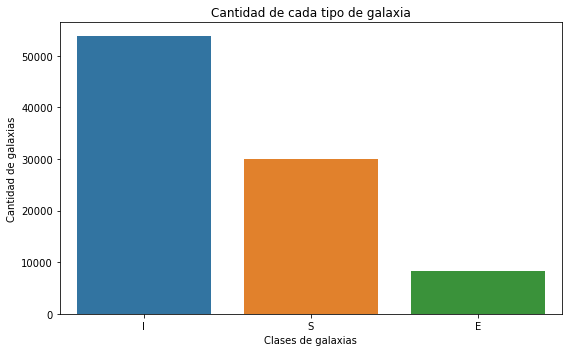

In [ ]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
#seaborn.set_theme(style="darkgrid")
seaborn.countplot(x="clase", data=data)
plt.title("Cantidad de cada tipo de galaxia")
plt.xlabel("Clases de galaxias")
plt.ylabel("Cantidad de galaxias")
plt.show()

Use histogramas y boxplots para visualizar intervalos de confianza, mediana, media, intercuartiles y *outliers* de la posición **z** y del tamaño **R** para algun tipo morfologíco.

### Análisis variable z

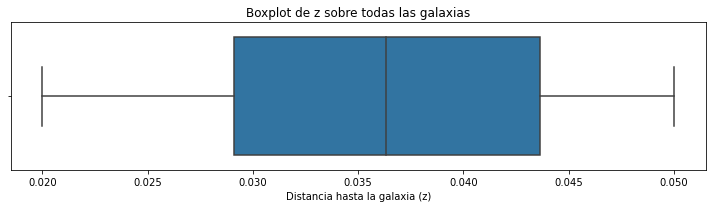

In [ ]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True
seaborn.boxplot(data=data, x="z")
plt.title("Boxplot de z sobre todas las galaxias")
plt.xlabel("Distancia hasta la galaxia (z)")
plt.show()

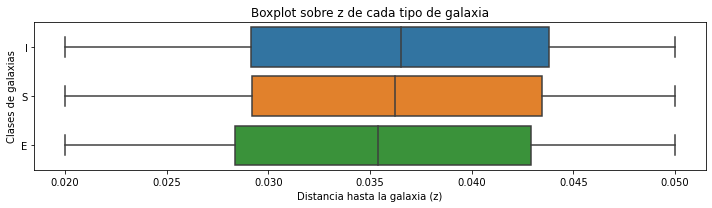

In [ ]:
seaborn.boxplot(data=data, x="z", y="clase")
plt.title("Boxplot sobre z de cada tipo de galaxia")
plt.xlabel("Distancia hasta la galaxia (z)")
plt.ylabel("Clases de galaxias")
plt.show()

Histogramas de cada galaxia sobre la variable z


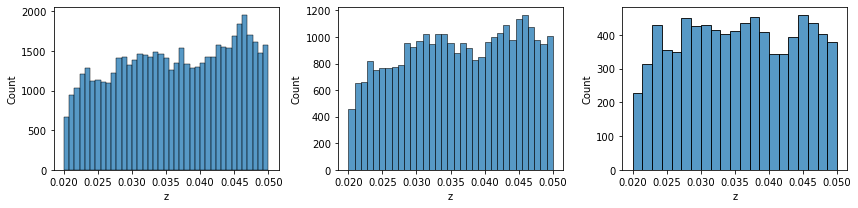

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3))
print("Histogramas de cada galaxia sobre la variable z")
seaborn.histplot(data=data[data.clase == "I"]['z'], ax=ax[0])
seaborn.histplot(data=data[data.clase == "S"]['z'], ax=ax[1])
seaborn.histplot(data=data[data.clase == "E"]['z'], ax=ax[2])
plt.show()

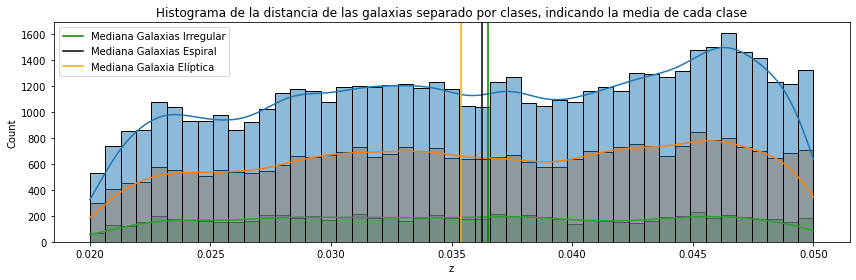

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data=data[['z','clase']], kde=True, x="z", hue="clase")
plt.axvline(data[data.clase == "I"].z.median(), color='green', linestyle='solid', label='Mediana Galaxias Irregular')
plt.axvline(data[data.clase == "S"].z.median(), color='black', linestyle='solid', label='Mediana Galaxias Espiral')
plt.axvline(data[data.clase == "E"].z.median(), color='orange', linestyle='solid', label='Mediana Galaxia Elíptica')
plt.title("Histograma de la distancia de las galaxias separado por clases, indicando la media de cada clase")
plt.legend()
plt.show()

##### Conclusión
La variable z no se encuentra muy dispersa, la mediana y la media de cada tipo de galaxia respecto a z son similares.

### Análisis variable R

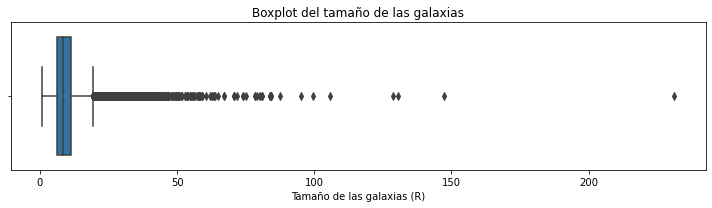

In [ ]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True
seaborn.boxplot(data=data, x="R")
plt.title("Boxplot del tamaño de las galaxias")
plt.xlabel("Tamaño de las galaxias (R)")
plt.show()

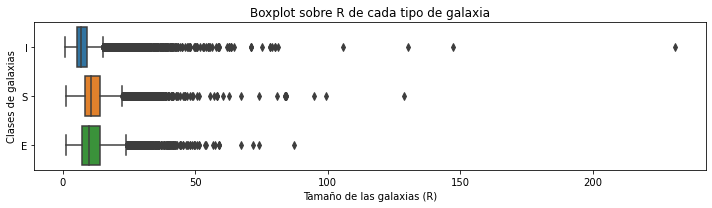

In [ ]:
seaborn.boxplot(data=data, x="R", y="clase")
plt.title("Boxplot sobre R de cada tipo de galaxia")
plt.xlabel("Tamaño de las galaxias (R)")
plt.ylabel("Clases de galaxias")
plt.show()

Histogramas de cada galaxia sobre la variable R


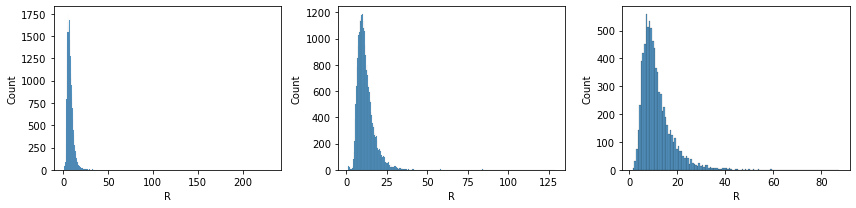

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3), sharex='col')
print("Histogramas de cada galaxia sobre la variable R")
seaborn.histplot(data=data[data.clase == "I"]['R'], ax=ax[0])
seaborn.histplot(data=data[data.clase == "S"]['R'], ax=ax[1])
seaborn.histplot(data=data[data.clase == "E"]['R'], ax=ax[2])

plt.show()

##### Conclusión
La variable R tiene valores extremos.

Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [ ]:
print("MEDIANA GALAXIAS IRREGULAR: " + str(data[data.clase == "I"].z.median()))
print("MEDIANA GALAXIAS ESPIRAL: " + str(data[data.clase == "S"].z.median()))
print("MEDIANA GALAXIAS ELÍPTICA: " + str(data[data.clase == "E"].z.median()))

MEDIANA GALAXIAS IRREGULAR: 0.03651552
MEDIANA GALAXIAS ESPIRAL: 0.03624282
MEDIANA GALAXIAS ELÍPTICA: 0.0353871


#Test de hipotesis
#Articulo: https://ichi.pro/es/pruebas-estadisticas-parametricas-vs-no-parametricas-en-python-172050829186378
#Si la mediana del grupo es la medida preferida de tendencia central para los datos, opte por pruebas no 
#paramétricas independientemente del tamaño de la muestra.




Se utiliza una prueba de Kruskal-Wallis para determinar si existe o no una diferencia estadísticamente significativa entre las medianas de tres o más grupos independientes. Se considera el equivalente no paramétrico del ANOVA de una vía .
La prueba de Kruskal-Wallis utiliza las siguientes hipótesis nulas y alternativas:

La hipótesis nula (H 0 ): la mediana es igual en todos los grupos.

La hipótesis alternativa: (Ha): la mediana no es igual en todos los grupos.

In [ ]:
data.columns

Index(['ra', 'dec', 'Mag_u', 'Mag_g', 'Mag_r', 'Mag_i', 'Mag_z', 'R', 'z',
       'color', 'eliptica', 'espiral', 'irregular', 'clase'],
      dtype='object')

In [ ]:
sp.stats.kruskal(data['eliptica'], data['espiral'], data['irregular'])

KruskalResult(statistic=50699.68123433925, pvalue=0.0)

El valor p es muy pequeño

# Valores característicos 

Mostrar los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

In [ ]:
data.groupby('clase').z.describe()

,count,mean,std,min,25%,50%,75%,max
clase,,,,,,,,
E,8257.0,0.035441,0.008377,0.020001,0.028338,0.035387,0.042901,0.049999
I,53799.0,0.036198,0.008473,0.020002,0.029136,0.036516,0.043803,0.050000
S,30046.0,0.036080,0.008375,0.020001,0.029204,0.036243,0.043443,0.049999


# Distribución Normal

- Grafique la distribución Normal variando sus estadísticos. Realice una breve descripción de los cambios que nota en estos.

In [ ]:
def clean_outliers_sd(dataset, column_name):
    interesting_col = dataset[column_name]
    mask_outlier = (np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

def clean_outliers_q3(dataset, column_name):
    interesting_col = dataset[column_name]
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

def remove_outlier(df_in, col_name, iqr_factor):
    """
    IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
    accept a dataframe, remove outliers, return cleaned data in a new dataframe
    see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
    """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

def calcular_estadistico(data,column):
    return ((data[column] - data[column].mean()) / (data[column].std() / np.square(len(data[column]))))

### Análisis variable R

In [ ]:
data_inliers_R, data_outliers_R = remove_outlier(data,'R',2.5)

In [ ]:
sp.stats.mode(data_inliers_R.R)

ModeResult(mode=array([10.49015]), count=array([20]))

In [ ]:
mediana = np.median(data_inliers_R.R)
percentil_50 = np.percentile(data_inliers_R.R,50)
print(f"La mediana: {mediana}\nEl percentil 50: {percentil_50}")

La mediana: 8.2745285
El percentil 50: 8.2745285


In [ ]:
print("Percentil 75 = " + str(np.percentile(data_inliers_R.R,75)))
print("Percentil 90 = " + str(np.percentile(data_inliers_R.R,90)))
print("Percentil 95 = " + str(np.percentile(data_inliers_R.R,95)))
print("El 95% de la muestra equivale a un R de 17.329334999999997")
print("El 50% de la muestra equivale a un R de 8.2745285. El 75% y el 90% se representan en 11.1509025 y 14.70774")

Percentil 75 = 11.1509025
Percentil 90 = 14.70774
Percentil 95 = 17.329334999999997
El 95% de la muestra equivale a un R de 17.329334999999997
El 50% de la muestra equivale a un R de 8.2745285. El 75% y el 90% se representan en 11.1509025 y 14.70774


In [ ]:
varianza = np.var(data_inliers_R.R)
print(f"La varianza es {varianza}")

La varianza es 16.81309521180666


In [ ]:
"Desvío Estándar", np.std(data_inliers_R.R)

('Desvío Estándar', 4.100377447480495)

In [ ]:
print("El R tiene un valor promedio de " + str(np.mean(data_inliers_R.R)) + " con una varianza de " + str(np.var(data_inliers_R.R)))

El R tiene un valor promedio de 9.069292574156497 con una varianza de 16.81309521180666


In [ ]:
"Rango", np.ptp(data_inliers_R.R)

('Rango', 23.5707816)

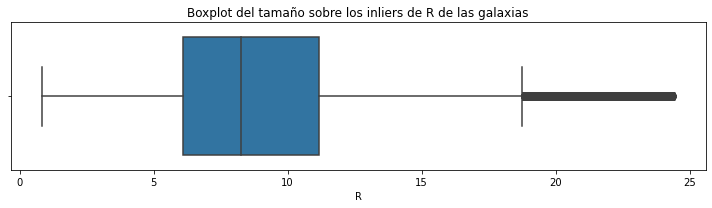

In [ ]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.boxplot(data=data_inliers_R, x="R")
plt.title("Boxplot del tamaño sobre los inliers de R de las galaxias")
plt.show()

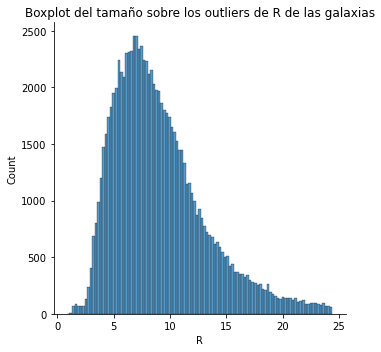

In [ ]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.displot(data=data_inliers_R, x="R")
plt.title("Boxplot del tamaño sobre los outliers de R de las galaxias")
plt.show()

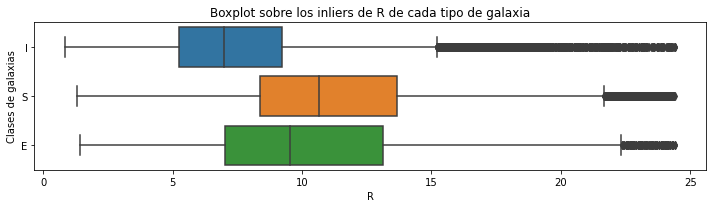

In [ ]:
seaborn.boxplot(data=data_inliers_R, x="R", y="clase")
plt.title("Boxplot sobre los inliers de R de cada tipo de galaxia")
plt.ylabel("Clases de galaxias")
plt.show()

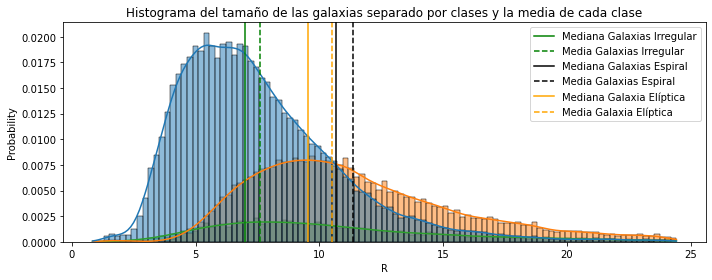

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
ax = seaborn.histplot(data=data_inliers_R[['R','clase']], kde=True, x="R", hue="clase", stat="probability")
plt.axvline(data_inliers_R[data_inliers_R.clase == "I"].R.median(), color='green', linestyle='solid', label='Mediana Galaxias Irregular')
plt.axvline(data_inliers_R[data_inliers_R.clase == "I"].R.mean(), color='green', linestyle='dashed', label='Media Galaxias Irregular')
plt.axvline(data_inliers_R[data_inliers_R.clase == "S"].R.median(), color='black', linestyle='solid', label='Mediana Galaxias Espiral')
plt.axvline(data_inliers_R[data_inliers_R.clase == "S"].R.mean(), color='black', linestyle='dashed', label='Media Galaxias Espiral')
plt.axvline(data_inliers_R[data_inliers_R.clase == "E"].R.median(), color='orange', linestyle='solid', label='Mediana Galaxia Elíptica')
plt.axvline(data_inliers_R[data_inliers_R.clase == "E"].R.mean(), color='orange', linestyle='dashed', label='Media Galaxia Elíptica')
plt.title("Histograma del tamaño de las galaxias separado por clases y la media de cada clase")
plt.legend()
plt.show()

Algunos valores físicos de las galaxias no pueden ser determinados. Muchas veces la alternativa al usual *NaN* es llenar la celda del valor faltante con cero o con números de valor muy grande o muy chico discordantes a los valores usuales que toma la cantidad física. 

Se puede optar por ignorar dicho número o remplazarlo por cero, el valor medio o eliminarlo en el caso que el dataset sea de una gran dimensión.

El caso anteriormente se observa con la variable *color* donde dos de las galaxias no tienen su color determinado. 

- Dele solución 
- Ajuste la distribución de la variable **color** con el tamaño del bin=0.1 a una Normal usando *sns.distplot* 
- Explique que observa

In [ ]:
data.color.describe()

count    92102.000000
mean        -1.830732
std         46.686363
min        -13.484570
25%         -2.510555
50%         -1.994779
75%         -1.606971
max      10015.860000
Name: color, dtype: float64

In [ ]:
data_color_filtered = data[data.color < data.color.max()]

<AxesSubplot:xlabel='color'>

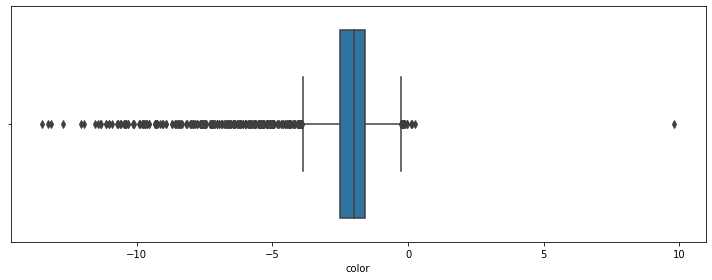

In [ ]:
seaborn.boxplot(x=data_color_filtered.color)

In [ ]:
df_inliers_color, df_outliers_color = remove_outlier(data,'color',2.5)

<AxesSubplot:xlabel='color', ylabel='Count'>

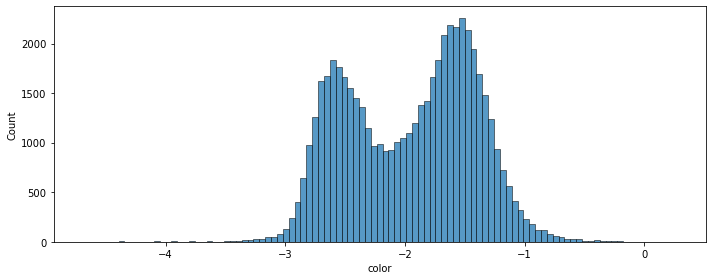

In [ ]:
seaborn.histplot(x=df_inliers_color[df_inliers_color.clase == "I"].color)

<AxesSubplot:xlabel='color', ylabel='Count'>

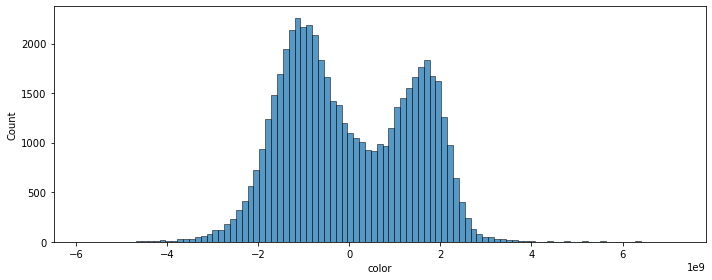

In [ ]:
estadistico_color_irregular = calcular_estadistico(df_inliers_color[df_inliers_color.clase == "I"],'color')
seaborn.histplot(data=estadistico_color_irregular)

C:\Users\Rafael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='color', ylabel='Density'>

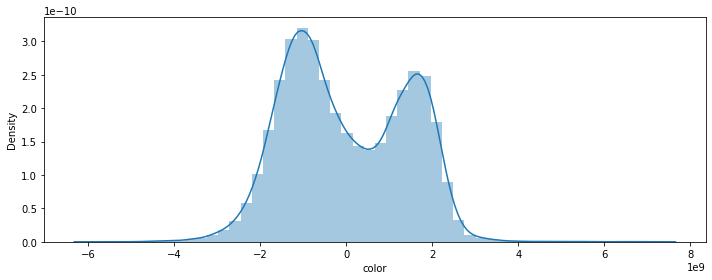

In [ ]:
seaborn.distplot(estadistico_color_irregular, bins=50)

C:\Users\Rafael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='color', ylabel='Density'>

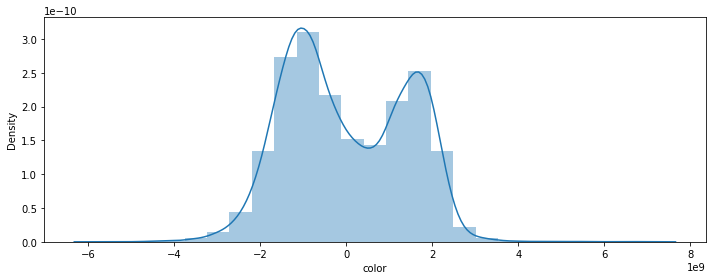

In [ ]:
seaborn.distplot(estadistico_color_irregular, bins=25)

C:\Users\Rafael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='color', ylabel='Density'>

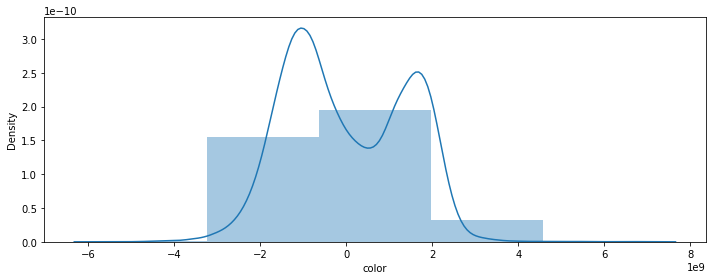

In [ ]:
seaborn.distplot(estadistico_color_irregular, bins=5)

C:\Users\Rafael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='color', ylabel='Density'>

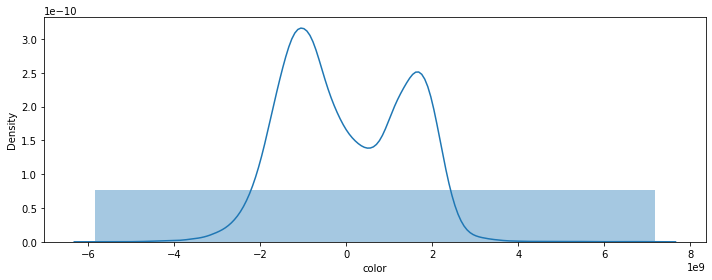

In [ ]:
seaborn.distplot(estadistico_color_irregular, bins=1)

# Probabilidad

- Calcule la Probabilidad marginal de cada tipo morfologico y grafiquela.

In [ ]:
#numero de cada tipo galaxia
(sum(data['eliptica']), sum(data['espiral']), sum(data['irregular']))

(8257, 30046, 53799)

In [ ]:
#probabilidades
prob_marg_elip = sum(data['eliptica'])/len(data['eliptica'])
prob_marg_espi = sum(data['espiral'])/len(data['espiral'])
prob_marg_irreg = sum(data['irregular'])/len(data['irregular'])
print(prob_marg_elip, prob_marg_espi, prob_marg_irreg)

0.08965060476428308 0.3262252719810645 0.5841241232546525


In [ ]:
#hago un dictionario 
prob_marginales={'eliptica':str(prob_marg_elip), 'espiral': str(prob_marg_espi), 'irregular':str(prob_marg_irreg)}
print(prob_marginales)

{'eliptica': '0.08965060476428308', 'espiral': '0.3262252719810645', 'irregular': '0.5841241232546525'}


Text(0.5, 1.0, 'Probabilidad marginal por tipo de galaxias')

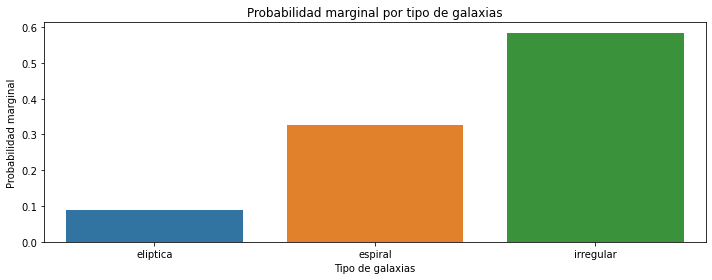

In [ ]:
import seaborn as sns
my_dict = {'eliptica':str(prob_marg_elip), 'espiral': str(prob_marg_espi), 'irregular':str(prob_marg_irreg)}
prob =  [float(i[:-1]) for i in my_dict.values()]

sns.barplot(x=list(my_dict.keys()),y=prob)
plt.xlabel("Tipo de galaxias")
plt.ylabel("Probabilidad marginal")
plt.title("Probabilidad marginal por tipo de galaxias") 


- Calcule la probabilida conjunta las galaxias de clase = E con el color  mayor a -2.1

- Analice la correlación entre dos de las variables a través de chi-cuadrado. Muestre esta correlación a través de mapas de calor.

# Conclusiones: